In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# Contexte

Ce projet abordera ce qu'on a vu en analyse et visualisation des données (et partira aussi un peu plus loin). Nous aborderons donc dans ce projet le dataset [Netflix Top Rated Movies and TV Shows](https://www.kaggle.com/datasets/thedevastator/netflix-top-rated-movies-and-tv-shows-2020-2022?select=Best+Movie+by+Year+Netflix.csv) Dataset, un dataset qui regroupe les meilleurs films et séries (basé sur leurs notes sur IMDb) avec les crédits pour chaque films. 

Téléchargez les fichiers sur votre PC et commençons ce projet !

## Charger les données

TIPS : Créer une variable par fichier et chargez les fichiers CSV (nommez convenablement les variables)

In [16]:
movies_year = pd.read_csv("./Fichiers/Best Movie by Year Netflix.csv", index_col='index')
shows_year = pd.read_csv("./Fichiers/Best Show by Year Netflix.csv", index_col='index')
movies_total = pd.read_csv("./Fichiers/Best Movies Netflix.csv", index_col='index')
shows_total = pd.read_csv("./Fichiers/Best Shows Netflix.csv", index_col='index')
credits = pd.read_csv("./Fichiers/raw_credits.csv", index_col='index')
titles = pd.read_csv("./Fichiers/raw_titles.csv", index_col='index')

On visualise rapidement l'un d'eux pour voir sa structure

In [17]:
movies_total.head()

,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION
index,,,,,,,
0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,documentary,GB
1,Inception,2010,8.8,2268288,148,scifi,GB
2,Forrest Gump,1994,8.8,1994599,142,drama,US
3,Anbe Sivam,2003,8.7,20595,160,comedy,IN
4,Bo Burnham: Inside,2021,8.7,44074,87,comedy,US


## 1. Best movies by Year

### Questions

On va commencer notre étude en analysant ce fichier. Il regroupe le meilleur film par année de sortie et donc il laisse les meilleurs films sur la plateforme. 

Répondez via des graphiques avec Matplotlib ou Seaborn ou bien des analyses avec Pandas aux questions suivantes : 
- Quel est le genre de film le plus présent ?
- Quel est la répartition des genres dans la liste des films ?
- Quel est le meilleur et le pire film en terme de note ?
- Quelle est la note moyenne donnée ?
- Quelle est la distribution des notes des films ?

QUESTIONS BONUS : 
- Quelle est la durée moyenne des films de la liste ?
- Quel est le réalisateur qui revient le plus dans la liste ?
- Quel est l'acteur qui revient le plus dans la liste ?

### Réponses

On commence en prenant le fichier et on le visualise pour connaitre les colonnes qu'on a 

In [18]:
movies_year.head()

,TITLE,RELEASE_YEAR,SCORE,MAIN_GENRE,MAIN_PRODUCTION
index,,,,,
0,White Christmas,1954,7.5,romance,US
1,The Guns of Navarone,1961,7.5,war,US
2,My Fair Lady,1964,7.8,drama,US
3,Bonnie and Clyde,1967,7.7,drama,US
4,Dirty Harry,1971,7.7,thriller,US


On peut voir les colonnes et leurs types comme suit

In [20]:
movies_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TITLE            49 non-null     object 
 1   RELEASE_YEAR     49 non-null     int64  
 2   SCORE            49 non-null     float64
 3   MAIN_GENRE       49 non-null     object 
 4   MAIN_PRODUCTION  49 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.3+ KB


On peut voir qu'il nous manque aucune donnée, ce qui est très bien on peut commencer à répondre alors

1. Quel est le genre de film le plus présent ?

In [21]:
movies_year["MAIN_GENRE"].value_counts()

drama          22
comedy          8
thriller        5
romance         3
horror          2
scifi           2
crime           2
war             1
western         1
fantasy         1
documentary     1
action          1
Name: MAIN_GENRE, dtype: int64

Donc on voit que les films drames sont les plus présents avec 22 films sur les 49. 

- On peut aussi voir une répartition :
    - Avec Pandas

<AxesSubplot:title={'center':'Genre'}>

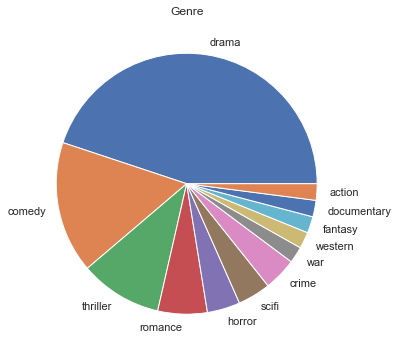

In [26]:
movies_year["MAIN_GENRE"].value_counts().plot.pie(figsize=(8,6), title="Genre", label='')

- Avec Matplotlib directement

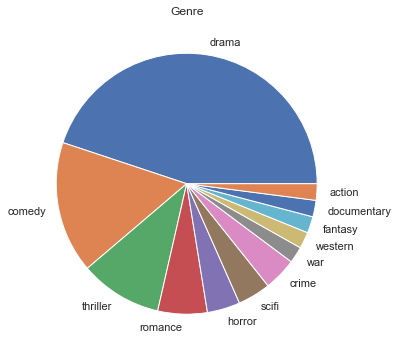

In [30]:
plt.figure(figsize=(8,6))
plt.pie(movies_year["MAIN_GENRE"].value_counts(), labels=movies_year["MAIN_GENRE"].value_counts().keys())
plt.title("Genre")
plt.show()

- Le meilleur et le pire film de la liste (en terme de note)

On commence par trouver le max et le min

In [32]:
movies_year.describe().T

,count,mean,std,min,25%,50%,75%,max
RELEASE_YEAR,49.0,1996.102041,17.335230,1954.0,1984.0,1998.0,2010.0,2022.0
SCORE,49.0,7.871429,0.632785,5.8,7.5,8.1,8.3,9.0


On peut donc voir le minimum est de 5.8 (ca doit être un très mauvais film) et la meilleure c'est un 9.0 (par contre celui la devrait être cool). On retrouve maintenant les index de chacun

In [36]:
movies_year["SCORE"].idxmax(axis=0)

46

In [37]:
movies_year["SCORE"].idxmin(axis=0)

9

Donc avec ca on peut très facilement retrouver la ligne correspondante

In [44]:
max_note = movies_year.loc[movies_year["SCORE"].idxmax(axis=0), 'TITLE']
min_note = movies_year.loc[movies_year["SCORE"].idxmin(axis=0), 'TITLE']

print(f'Le meilleur film est "{max_note}" et le pire est "{min_note}"')

Le meilleur film est "David Attenborough: A Life on Our Planet" et le pire est "The Blue Lagoon"


- Quelle est la note moyenne donnée ?

Cette question on peut y répondre avec un bout de code précédemment utilisé

In [45]:
movies_year.describe().T

,count,mean,std,min,25%,50%,75%,max
RELEASE_YEAR,49.0,1996.102041,17.335230,1954.0,1984.0,1998.0,2010.0,2022.0
SCORE,49.0,7.871429,0.632785,5.8,7.5,8.1,8.3,9.0


On peut donc voir que la note moyenne est de 7.87

- On affiche maintenant la distribution

<AxesSubplot:title={'center':'Distribution des notes'}, ylabel='Frequency'>

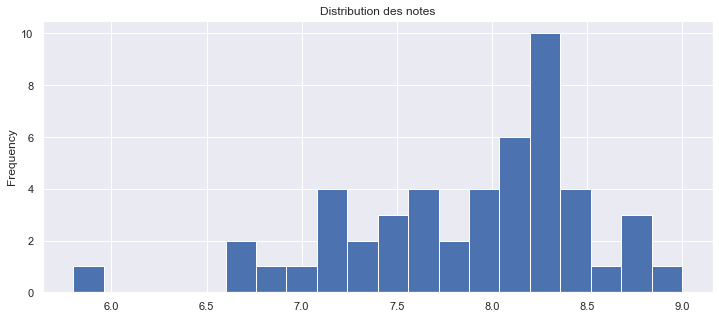

In [53]:
movies_year["SCORE"].plot.hist(figsize=(12,5), title="Distribution des notes", label='', bins=20, xlabel='Notes', ylabel='')

On peut voir que la majorité des films ont une note entre 8 et 8.5

- Les questions bonus

Quelle est la durée moyenne des films ? 

Pour se faire il faudra qu'on fusionne deux sources de données, celle qu'on utilise en ce moment qui est la liste des sélectionné ainsi que la liste total des films qui contient la durée des films

In [109]:
movies_year_with_duration = movies_year.merge(right=movies_total, how='left', on=['TITLE', 'SCORE', 'RELEASE_YEAR', 'MAIN_GENRE', 'MAIN_PRODUCTION'])

In [110]:
movies_year_with_duration.head()

,TITLE,RELEASE_YEAR,SCORE,MAIN_GENRE,MAIN_PRODUCTION,NUMBER_OF_VOTES,DURATION
0,White Christmas,1954,7.5,romance,US,42373.0,115.0
1,The Guns of Navarone,1961,7.5,war,US,50150.0,158.0
2,My Fair Lady,1964,7.8,drama,US,94121.0,170.0
3,Bonnie and Clyde,1967,7.7,drama,US,111189.0,110.0
4,Dirty Harry,1971,7.7,thriller,US,153463.0,102.0


On peut observer que les films qui ont une note inférieure à 7.5 et donc on aura trois lignes qui sont vides (remplacées par des NaN), qui ne seront pas pris en compte

In [69]:
movies_year_with_duration.describe().T

,count,mean,std,min,25%,50%,75%,max
RELEASE_YEAR,49.0,1996.102041,17.335230,1954.0,1984.00,1998.0,2010.00,2022.0
SCORE,49.0,7.871429,0.632785,5.8,7.50,8.1,8.30,9.0
NUMBER_OF_VOTES,46.0,350052.347826,490910.307129,25687.0,81939.75,180389.5,392299.75,2268288.0
DURATION,46.0,131.456522,36.307763,65.0,103.25,124.0,160.25,229.0


On peut voir ainsi que la durée moyenne d'un film de cette liste est de 131.45 min avec un minimum de 65 min et un maximum de 229 min.

- Quel est le réalisateur qui revient le plus dans la liste ?
Pour se faire on va prendre les credits à partir de raw_credits.csv et les fusionner avec raw_titles.csv à travers duquel on pourra faire la reconnaissance titre du film <-> id

In [71]:
credits.head()

,person_id,id,name,character,role
index,,,,,
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [75]:
credits["role"].value_counts()

ACTOR       72690
DIRECTOR     4523
Name: role, dtype: int64

On peut voir qu'on a 72690 acteurs et 4523 réalisateurs

In [76]:
titles.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
index,,,,,,,,,,,,
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


In [103]:
credits_with_title = credits.merge(right=titles, how='left', on='id')[["id", "name", "role", "title", "type", "release_year", 'runtime', 'imdb_score', 'imdb_votes']]
credits_with_title

,id,name,role,title,type,release_year,runtime,imdb_score,imdb_votes
0,tm84618,Robert De Niro,ACTOR,Taxi Driver,MOVIE,1976,113,8.3,795222.0
1,tm84618,Jodie Foster,ACTOR,Taxi Driver,MOVIE,1976,113,8.3,795222.0
2,tm84618,Albert Brooks,ACTOR,Taxi Driver,MOVIE,1976,113,8.3,795222.0
3,tm84618,Harvey Keitel,ACTOR,Taxi Driver,MOVIE,1976,113,8.3,795222.0
4,tm84618,Cybill Shepherd,ACTOR,Taxi Driver,MOVIE,1976,113,8.3,795222.0
...,...,...,...,...,...,...,...,...,...
77208,tm1098060,Nnenna Rachael Okonkwo,ACTOR,Shadow Parties,MOVIE,2021,116,6.2,9.0
77209,tm1098060,Lucien Morgan,ACTOR,Shadow Parties,MOVIE,2021,116,6.2,9.0
77210,tm1098060,Magdalena Korpas,ACTOR,Shadow Parties,MOVIE,2021,116,6.2,9.0
77211,tm1098060,Mistura Olusanya,ACTOR,Shadow Parties,MOVIE,2021,116,6.2,9.0


Maintenant on filtre pour ne garder que nos 49 films et on ne garde que les acteurs

In [97]:
credits_with_title_actor = credits_with_title[(credits_with_title["title"].isin(movies_year["TITLE"])) & (credits_with_title["role"]=="ACTOR")]
credits_with_title_actor.head()

,id,name,role,title,type,release_year,runtime,imdb_score
0,tm84618,Robert De Niro,ACTOR,Taxi Driver,MOVIE,1976,113,8.3
1,tm84618,Jodie Foster,ACTOR,Taxi Driver,MOVIE,1976,113,8.3
2,tm84618,Albert Brooks,ACTOR,Taxi Driver,MOVIE,1976,113,8.3
3,tm84618,Harvey Keitel,ACTOR,Taxi Driver,MOVIE,1976,113,8.3
4,tm84618,Cybill Shepherd,ACTOR,Taxi Driver,MOVIE,1976,113,8.3


In [98]:
credits_with_title_actor["name"].value_counts()

Aamir Khan           5
Terry Jones          3
Robert De Niro       3
Zach Hanner          3
Tom Hanks            3
                    ..
Adam Sandler         1
Jack MacGowran       1
Parikshat Sahni      1
Julian Rhind-Tutt    1
Mrunal Jadhav        1
Name: name, Length: 1722, dtype: int64

Donc on a Aamir Khan qui est l'acteur qui revient le plus souvent (ce qui est très surprenant il est au dessus de Robert De Niro et Tom Hanks...). 

On fait de même pour les réalisateurs

In [99]:
credits_with_title_real = credits_with_title[(credits_with_title["title"].isin(movies_year["TITLE"])) & (credits_with_title["role"]=="DIRECTOR")]
credits_with_title_real.head()

,id,name,role,title,type,release_year,runtime,imdb_score
36,tm84618,Martin Scorsese,DIRECTOR,Taxi Driver,MOVIE,1976,113,8.3
83,tm127384,Terry Jones,DIRECTOR,Monty Python and the Holy Grail,MOVIE,1975,91,8.2
84,tm127384,Terry Gilliam,DIRECTOR,Monty Python and the Holy Grail,MOVIE,1975,91,8.2
106,tm70993,Terry Jones,DIRECTOR,Life of Brian,MOVIE,1979,94,8.0
148,tm190788,William Friedkin,DIRECTOR,The Exorcist,MOVIE,1973,133,8.1


In [100]:
credits_with_title_real["name"].value_counts()

Rob Reiner                 2
Terry Jones                2
Ashutosh Gowariker         2
Bo Burnham                 1
Alastair Fothergill        1
George Cukor               1
Terry Gilliam              1
Dennis Dugan               1
Rajkumar Hirani            1
Martin Scorsese            1
Albert Hughes              1
Wilson Yip                 1
James Mangold              1
Penny Marshall             1
Robert Rodriguez           1
Randal Kleiser             1
John Carpenter             1
John Huston                1
Don Siegel                 1
Rob Marshall               1
Nitesh Tiwari              1
Christoffer Boe            1
Nishikant Kamat            1
Hideaki Anno               1
Roland Emmerich            1
Gavin O'Connor             1
Quentin Tarantino          1
Stan Lathan                1
Michael Curtiz             1
J. Lee Thompson            1
Jonathan Hughes            1
Aamir Khan                 1
Robert Zemeckis            1
Steven Spielberg           1
Sergio Leone  

La on a trois réalisateurs avec le même nombre d'apparitions dans la liste : Rob Reiner, Terry Jones et Ashutosh Gowariker (ces indiens ils sont partout).

BONUS : ajouter une distribution avec la notes données, le nombre de votes ainsi que le genre du film

In [111]:
movies_year_with_duration.head()

,TITLE,RELEASE_YEAR,SCORE,MAIN_GENRE,MAIN_PRODUCTION,NUMBER_OF_VOTES,DURATION
0,White Christmas,1954,7.5,romance,US,42373.0,115.0
1,The Guns of Navarone,1961,7.5,war,US,50150.0,158.0
2,My Fair Lady,1964,7.8,drama,US,94121.0,170.0
3,Bonnie and Clyde,1967,7.7,drama,US,111189.0,110.0
4,Dirty Harry,1971,7.7,thriller,US,153463.0,102.0


Text(0.5, 1.0, 'Répartition des genres de films')

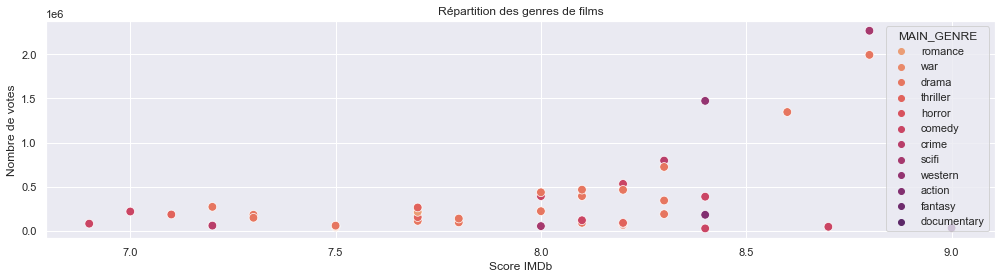

In [140]:
plt.figure(figsize=(17,4))
sns.scatterplot(data=movies_year_with_duration, x="SCORE", y="NUMBER_OF_VOTES", hue="MAIN_GENRE", palette="flare", s=75)
plt.xlabel("Score IMDb")
plt.ylabel("Nombre de votes")
plt.title("Répartition des genres de films")

## 2. Best show by year

### Questions

Maintenant on passe aux meilleures séries par année de sortie disponible sur la plateforme. 

Répondez via des graphiques avec Matplotlib ou Seaborn ou bien des analyses avec Pandas aux questions suivantes :
- Quel est le genre de série le plus présent ?
- Quel est la répartition des genres dans la liste des séries ?
- Quel est la meilleure et la pire série en terme de note ?
- Quelle est la note moyenne donnée ?
- Quelle est la distribution des notes des séries ?
- Quelle est le nombre moyen de saisons dans la liste ?
- Mettez en place une répartition entre la note donnée et le nombre de saisons qu'on a

QUESTIONS BONUS : 
- Quel est le réalisateur qui revient le plus dans la liste ?
- Quel est l'acteur qui revient le plus dans la liste ?

### Réponses

Ce sera quasiment la même chose que dans la première partie, alors on va aller plus vite

- Le genre de série le plus présent et leurs répartitions ?

In [141]:
shows_year["MAIN_GENRE"].value_counts()

scifi          9
comedy         8
drama          8
action         4
documentary    1
western        1
Name: MAIN_GENRE, dtype: int64

On trouve donc qu'ici c'est la Science Fiction qui est la plus présente, avec la répartition suivante

<AxesSubplot:title={'center':'Genre'}>

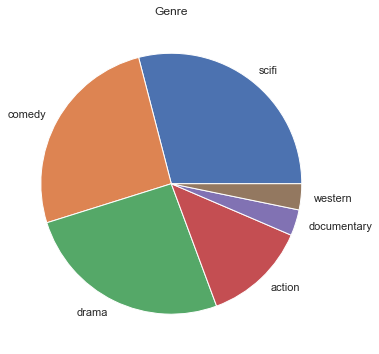

In [142]:
shows_year["MAIN_GENRE"].value_counts().plot.pie(figsize=(8,6), title="Genre", label='')

- La meilleure et la pire série en terme de notes ? ainsi que la note moyenne (et médiane)

In [143]:
shows_year.describe().T

,count,mean,std,min,25%,50%,75%,max
RELEASE_YEAR,31.0,2005.645161,11.973717,1969.0,1999.5,2007.0,2014.50,2022.0
SCORE,31.0,8.606452,0.631894,6.7,8.5,8.8,8.95,9.5
NUMBER_OF_SEASONS,31.0,5.322581,4.174423,1.0,3.0,5.0,6.00,21.0


On trouve les informations suivantes sur les notes alors : 
- La pire note est 6.7
- La meilleure note est 9.5
- La note moyenne est de 8.6
- La note médiane est de 8.8

In [145]:
max_note = shows_year.loc[shows_year["SCORE"].idxmax(axis=0), 'TITLE']
min_note = shows_year.loc[shows_year["SCORE"].idxmin(axis=0), 'TITLE']

print(f'La meilleure série est "{max_note}" et la pire est "{min_note}"')

La meilleure série est "Breaking Bad" et la pire est "iCarly"


On affiche maintenant la distribution des notes sur les séries présentent dans la liste

<AxesSubplot:title={'center':'Distribution des notes'}, ylabel='Frequency'>

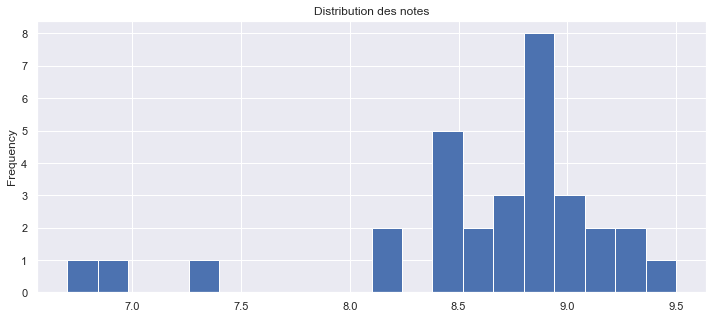

In [147]:
shows_year["SCORE"].plot.hist(figsize=(12,5), title="Distribution des notes", label='', bins=20, xlabel='Notes', ylabel='')

- Nombre moyen de saison ? 

In [148]:
shows_year["NUMBER_OF_SEASONS"].mean()

5.32258064516129

Il est donc d'environ 5.3 saisons par série dans la liste

In [149]:
shows_year["NUMBER_OF_SEASONS"].median()

5.0

Et la médiane est de 5 saisons donc ca reste cohérent

- Répartition entre la note donnée et le nombre de saison

In [150]:
shows_year.head()

,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION
index,,,,,,
0,Monty Python's Flying Circus,1969,8.8,4,comedy,GB
1,Knight Rider,1982,6.9,4,action,US
2,Seinfeld,1989,8.9,9,comedy,US
3,Star Trek: Deep Space Nine,1993,8.1,7,scifi,US
4,Neon Genesis Evangelion,1995,8.5,1,scifi,JP


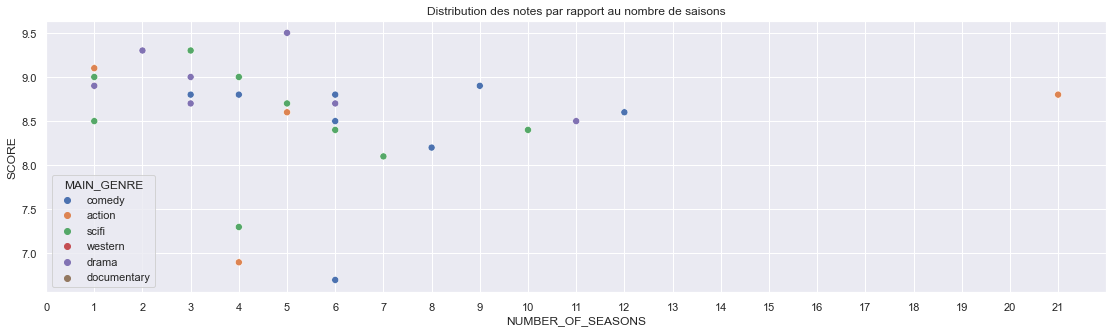

In [157]:
plt.figure(figsize=(19,5))
sns.scatterplot(data=shows_year, x="NUMBER_OF_SEASONS", y="SCORE", hue="MAIN_GENRE", s=50)
plt.xticks(ticks=np.arange(0,22))
plt.title("Distribution des notes par rapport au nombre de saisons")
plt.show()

QUESTIONS BONUS

Essayer de le faire tout seul (c'est la même chose que la partie précédente)

## 3. Best movies

### Questions

Maintenant on va passer à l'analyse de tous les films qui ont eu, au moins, une note de 7.5 sur IMDb.

Répondez via des graphiques avec Matplotlib ou Seaborn ou bien des analyses avec Pandas aux questions suivantes :
- Quelle est l'année qui est la plus présente ? Et donnez une distribution (ou répartition) en nombre d'apparition
- Quel est le genre qui revient le plus souvent ? Et donnez une distribution (ou répartition) en nombre d'apparition
- Quelle est la production la plus recurente ?
- Quelle est la durée moyenne d'un film dans la liste ?
- Quel est le film le plus long et le plus court de la liste ?
- Affichez une distribution regroupant les notes données, le nombre de votes et le genre du film. A priori quel est le meilleur genre de film ?
- Quelle est la variable la plus corrélée avec la note donnée ?  
- Quel est l'acteur (ou l'actrice) qui revient le plus souvent dans les crédits ?
- Quel est le réalisateur (ou réalisatrice) qui revient le plus souvent dans les crédits ?

QUESTIONS BONUS : 
- Quel est l'acteur avec les films avec la note moyenne la plus haute ? 
- Quel est le réalisateur avec les films avec la note moyenne la plus haute ?

### Réponses

## 4. Best shows

### Questions

Maintenant on va passer à l'analyse de toutes les séries qui ont eu, au moins, une note de 7.5 sur IMDb.

Répondez via des graphiques avec Matplotlib ou Seaborn ou bien des analyses avec Pandas aux questions suivantes :
- Quelle est l'année qui est la plus présente ? Et donnez une distribution (ou répartition) en nombre d'apparition
- Quel est le genre qui revient le plus souvent ? Et donnez une distribution (ou répartition) en nombre d'apparition
- Quelle est la production la plus recurente ?
- Quelle est la durée moyenne d'un épisode de la série dans la liste ?
- Quelle est la série avec le plus de saisons (ou les séries) ?
- Affichez une distribution regroupant les notes données, le nombre de votes et le genre de la série. A priori quel est le meilleur genre de série ?
- Quelle est la variable la plus corrélée avec la note donnée ?  
- Quel est l'acteur (ou l'actrice) qui revient le plus souvent dans les crédits ?
- Quel est le réalisateur (ou réalisatrice) qui revient le plus souvent dans les crédits ?

QUESTIONS BONUS : 
- Quel est l'acteur avec les films avec la note moyenne la plus haute ? 
- Quel est le réalisateur avec les films avec la note moyenne la plus haute ?

### Réponses